# DBSCAN

Density - Based - Spacial - Clustering of - Aplications with - Noise

## Explicación

Considere un conjunto de puntos a ser agrupados en un espacio determinado. La técnica de agrupación DBSCAN clasifica los puntos como puntos núcleo, puntos (densamente-)alcanzables, o ruido de la siguiente forma:

- Un punto p es un **punto núcleo** si al menos M (la cantidad de puntos mínimos necesarios dentro del radio $ε$, hiperparametro de DBSCAN) puntos están a una distancia $ε$ ( el radio, otro hiperparametro del DBSCAN) de él y, esos puntos son **directamente alcanzables** desde p. No es posible tener puntos directamente alcanzables desde un punto que no sea un núcleo.

- Un punto $q$ es **alcanzable** desde $p$ si existe una secuencia de puntos $p_{1},...,p_{n}$ donde $p_{1} = p$ y $p_{n} = q$ tal que cada punto $ p_{i+1}$ es directamente alcanzable desde ${\displaystyle p_{i}}$; es decir, todos los puntos de la secuencia deben ser puntos núcleos, con la posible excepción de $q$.

- Note que **la relación de ser alcanzable no es simétrica**. Por definición, ningún punto puede ser alcanzable desde un punto que no sea núcleo, sin importar la distancia a la que se encuentre, es decir, un punto que no sea núcleo puede ser alcanzable pero nada puede ser alcanzado desde este. Por lo tanto la noción de connectividad es necesaria para definir formalmente la extensión de un cluster dada por DBSCAN

-  Dos puntos $p$ y $q$ están **conectados densamente si existe un punto $o$ tal que ambos $p$ y $q$ sean directamente alcanzables desde $o$. La relación estar densamente conectado es simétrica**. 

- Un punto que no sea alcanzable desde cualquier otro punto es considerado ruido.

<img src= 'img/DBSCAN.png'>

## El algoritmo

DBSCAN requiere dos parámetros: $e (eps)$ (el radio) y el número mínimo de puntos requeridos para que una región se considere densa M (minPts).

- El algoritmo comienza por un punto arbitrario que no haya sido visitado. La $e (eps)$-vecindad de este punto es visitada, y si contiene suficientes puntos, se inicia un clúster sobre el mismo. De lo contrario, el punto es etiquetado como ruido. Notar que el punto en cuestión puede pertenecer a otra vecindad que lo incluya en el clúster correspondiente.

- Si un punto se incluye en la parte densa de un clúster, su $e (eps)$-vecindad también forma parte del clúster. Así, todos los puntos de dicha vecindad se añaden al clúster, al igual que las $e (eps)$-vecindad de estos puntos que sean lo suficientemente densas. Este proceso continúa hasta construir completamente un clúster densamente conectado. 

- Un nuevo punto no visitado se visita y procesa con el objetivo de descubrir otro clúster o ruido. 

## DBSCAN en sklearn

### parametros


1. **eps: float, default=0.5**

The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

2. **min_samples: int, default=5**

    The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. If min_samples is set to a higher value, DBSCAN will find denser clusters, whereas if it is set to a lower value, the found clusters will be more sparse.
    
3. **metric: str, or callable, default= 'euclidean'**

The metric to use when calculating distance between instances in a feature array. If metric is a string or callable, it must be one of the options allowed by sklearn.metrics.pairwise_distances for its metric parameter. If metric is “precomputed”, X is assumed to be a distance matrix and must be square. X may be a sparse graph, in which case only “nonzero” elements may be considered neighbors for DBSCAN.

New in version 0.17: metric precomputed to accept precomputed sparse matrix.

4. **metric_params: dict, default=None**

Additional keyword arguments for the metric function.

New in version 0.19.

5. **algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'**

The algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors. See NearestNeighbors module documentation for details.

6. **leaf_size: int, default=30**

Leaf size passed to BallTree or cKDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

7. **p: float, default=None**

The power of the Minkowski metric to be used to calculate distance between points. If None, then p=2 (equivalent to the Euclidean distance).

8. **n_jobs: int, default=None**

The number of parallel jobs to run. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

### atributos

1. **core_sample_indices_; ndarray of shape (n_core_samples,)**

Indices of core samples.

2. **components_ ndarray of shape (n_core_samples, n_features)**

Copy of each core sample found by training.

3. **labels_ ndarray of shape (n_samples)**

Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.

4. **n_features_in_int**

Number of features seen during fit.

New in version 0.24.

5. **feature_names_in_ ndarray of shape (n_features_in_,)**

Names of features seen during fit. Defined only when X has feature names that are all strings.


In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [2]:
datos = np.loadtxt('casas.csv', delimiter=',')
print(datos.shape)
print(datos)

(307, 2)
[[ 1.  6.]
 [ 1. 10.]
 [ 1. 17.]
 [ 1. 23.]
 [ 1. 24.]
 [ 1. 26.]
 [ 1. 27.]
 [ 2.  4.]
 [ 2.  5.]
 [ 2.  7.]
 [ 2. 12.]
 [ 2. 14.]
 [ 2. 17.]
 [ 2. 19.]
 [ 2. 22.]
 [ 2. 23.]
 [ 2. 24.]
 [ 2. 25.]
 [ 2. 26.]
 [ 2. 27.]
 [ 3.  4.]
 [ 3.  5.]
 [ 3.  8.]
 [ 3. 13.]
 [ 3. 16.]
 [ 3. 21.]
 [ 3. 22.]
 [ 3. 23.]
 [ 3. 24.]
 [ 3. 25.]
 [ 3. 26.]
 [ 3. 27.]
 [ 4.  4.]
 [ 4.  5.]
 [ 4.  6.]
 [ 4.  7.]
 [ 4.  9.]
 [ 4. 15.]
 [ 4. 20.]
 [ 4. 21.]
 [ 4. 22.]
 [ 4. 23.]
 [ 4. 24.]
 [ 4. 25.]
 [ 4. 26.]
 [ 4. 27.]
 [ 5.  4.]
 [ 5.  5.]
 [ 5.  6.]
 [ 5.  7.]
 [ 5.  8.]
 [ 5. 10.]
 [ 5. 12.]
 [ 5. 16.]
 [ 5. 19.]
 [ 5. 20.]
 [ 5. 21.]
 [ 5. 22.]
 [ 5. 23.]
 [ 5. 24.]
 [ 5. 25.]
 [ 5. 26.]
 [ 6.  4.]
 [ 6.  5.]
 [ 6.  6.]
 [ 6.  7.]
 [ 6.  8.]
 [ 6.  9.]
 [ 6. 10.]
 [ 6. 18.]
 [ 6. 19.]
 [ 6. 20.]
 [ 6. 21.]
 [ 6. 22.]
 [ 6. 23.]
 [ 6. 24.]
 [ 6. 25.]
 [ 6. 26.]
 [ 6. 27.]
 [ 7.  5.]
 [ 7.  6.]
 [ 7.  7.]
 [ 7.  8.]
 [ 7.  9.]
 [ 7. 11.]
 [ 7. 13.]
 [ 7. 17.]
 [ 7. 18.]
 [ 7. 19.]
 [ 7. 20.]
 

In [3]:
clusters = DBSCAN(eps= 2, min_samples=10)
clusters.fit(datos)

DBSCAN(eps=2, min_samples=10)

In [6]:
print(clusters.labels_)

[-1 -1 -1  0  0  0  0 -1  1  1 -1 -1 -1 -1  0  0  0  0  0  0  1  1  1 -1
 -1  0  0  0  0  0  0  0  1  1  1  1  1 -1  0  0  0  0  0  0  0  0  1  1
  1  1  1  1 -1 -1  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  0  0  0
  0  0  0  0  0  0  0  1  1  1  1  1  1 -1  0  0  0  0  0  0  0  0  0  0
  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  0
  0  0  0  0  0  0  0  0  0 -1  1  1  1  0  0  0  0  0  0  0  0  0  0  0
 -1  1  1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0 -1 -1 -1
  0  0  0  0  0  0  0  0  0 -1  2 -1  0  0  0  0  0  2  2  2 -1 -1 -1  0
  0  0  0  0  0  0  2  2  2  2  2  2  2  0  0  0  0  0  0  2  2  2  2  2
  2  2  2  2 -1 -1 -1  0  2  2  2  2  2  2  2  2  2 -1 -1 -1 -1  2  2  2
  2  2  2  2  2 -1 -1 -1 -1 -1  2  2  2  2 -1 -1  2  2 -1]


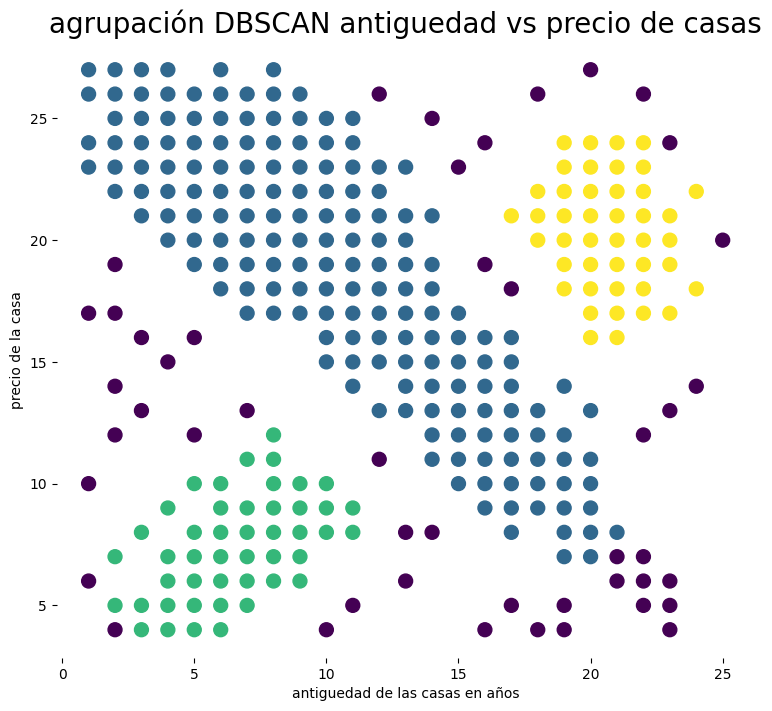

In [9]:
plt.figure(figsize= (9, 8))
plt.scatter(datos[:, 0], datos[:, 1], 
            c= clusters.labels_, s =100)
plt.title('agrupación DBSCAN antiguedad vs precio de casas', fontsize= 20)
plt.xlabel('antiguedad de las casas en años')
plt.ylabel('precio de la casa')
plt.box(False)
plt.show()

## Complejidad 

DBSCAN visita cada punto de la base de datos, posiblemente varias veces (e.g., como candidatos a diferentes clusters). Para la práctica, sin embargo, la complejidad temporal es mayormente gobernada por el número de llamados a regionQuery. DBSCAN ejecuta exactamente una consulta por cada punto, y si se utiliza una estructura de índice (indexing structure) que ejecute la consulta a los vecinos (neighborhood query) en O(log n), la complejidad temporal total sería O(n log n). Sin usar la estructura de índice, la complejidad temporal sería O(n²). A menudo, la matriz de distancias de tamaño (n²-n)/2 se construye para evitar recalcular las distancias. Esto necesita O(n²) de memoria, mientras que con una implementación que no se base en matrices solo se necesita O(n) de memoria. 

## Ventajas

1. DBSCAN **no necesita de la especificación del número de clusters** deseado como lo requiere k-means.

2. DBSCAN puede encontrar clusters con **formas geométricas arbitrarias**. Puede incluso hallar un cluster completamente rodeado (pero no conectado) de otro cluster distinto. Debido al parámetro MinPts, se reduce el efecto single-link (clusters diferentes pueden conectarse mediante una delgada línea de puntos).

3. DBSCAN tiene noción del ruido, y es **robusto detectando outliers**.

4. DBSCAN requiere **solo de dos parámetros y no es susceptible al orden en que se encuentren los puntos** dentro de la base de datos. (Sin embargo, los puntos de las fronteras de dos clusters diferentes pueden pertenecer a uno u otro cluster si el orden de los puntos en la base de datos se cambia, y la asignación del cluster es única solo en isomorfismos.)

5. DBSCAN está diseñado para bases de datos que puedan acelerar las consultas en regiones, e.g usando un R* tree.

## Desventajas

1. DBSCAN **no es enteramente determinista**: los puntos borde que son alcanzables desde más de un cluster pueden etiquetarse en cualquiera de estos. Afortunadamente, esta situación no es usual, y tiene un impacto pequeño sobre el cluster: en los puntos núcleo y ruidosos, DBSCAN es determinista. DBSCAN*4​ es una variación que trata los puntos borde como ruido, y así logra un resultado completamente determinista, así como una interpretación estadística de las componentes densamente conectadas más consistente.

2. La calidad de DBSCAN **depende de la noción de distancia** (distance measure) usada en la función. La distancia más usada es la **distancia euclidiana**. Especialmente para los datos de alta dimensión, este indicador es inútil debido a la llamada "**maldición de dimensionalidad**", por lo que es difícil encontrar un valor adecuado para $e$. Este efecto, sin embargo, también está presente en cualquier otro algoritmo basado en la distancia euclidiana.

3. DBSCAN **no puede agrupar conjuntos de datos bien con grandes diferencias en las densidades**, ya que la combinación $M y e$ no se puede escoger adecuadamente para todos los grupos.